# Import Libraries

In [1]:
import tensorflow as tf

import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Read text file

In [2]:
poem_file = open('datasets/poem.txt','r')
poem = poem_file.read()

# Data Visualization

### Count Words

In [3]:
def count_words(text):
    # Maynot be correct word count
    count = text.count(" ") + 1
    print(f"Word Count: {count}")

def count_lines(text):
    count = text.count("\n") + 1
    print(f"Line Count: {count}")

### Word Cloud

Word Count: 17765
Line Count: 4092


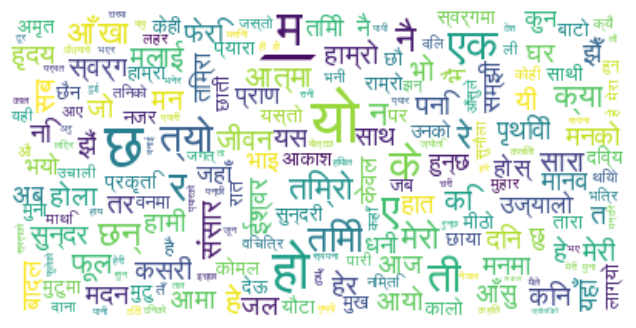

In [4]:
font_path = "font/gargi.ttf"

wordlcloud = WordCloud(max_font_size = 50,
                       max_words = 200,
                       font_path = font_path,
                       background_color = 'white',
                       regexp=r"[\u0900-\u097F]+" ).generate(poem)

count_words(poem)
count_lines(poem)

plt.figure(figsize=(8,4))
plt.imshow(wordlcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### You can see the most frequent terms are stop-words.

# Preprocessing

### Load preprocessing texts

In [5]:
nepali_num_file=open("preprocess/numbers.txt","r",encoding="utf-8")
nepali_num=nepali_num_file.read()
nepali_num=nepali_num.split(",")

### Split the corpus

In [6]:
poem_corpus = poem.split("\n")
print(poem_corpus[:5])

['नछाडी जानोस् हे मेरा प्राण ! अकेली मलाई,', 'मनको वनमा ननिभ्ने गरी विरह जलाई !', 'ननिभ्ने गरी विरह जलाई,', 'लोचनका तारा ! हे मेर प्यारा ! यो जोति  बिलाए !', 'के भनूँ? भन्ने म केही थिइन  विष नै पिलाए !']


# Using Tokenizer

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(poem_corpus)
total_words = len(tokenizer.word_index) + 1

In [8]:
word_index = tokenizer.word_index
print(word_index['नछाडी'])

1342


In [9]:
# Converting the text into embeddings
input_sequences = []
for line in poem_corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	print(line)
	print(token_list)
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		print(n_gram_sequence)
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]


नछाडी जानोस् हे मेरा प्राण ! अकेली मलाई,
[1342, 2626, 13, 40, 104, 628, 24]
[1342, 2626]
[1342, 2626, 13]
[1342, 2626, 13, 40]
[1342, 2626, 13, 40, 104]
[1342, 2626, 13, 40, 104, 628]
[1342, 2626, 13, 40, 104, 628, 24]
मनको वनमा ननिभ्ने गरी विरह जलाई !
[49, 116, 866, 117, 473, 1343]
[49, 116]
[49, 116, 866]
[49, 116, 866, 117]
[49, 116, 866, 117, 473]
[49, 116, 866, 117, 473, 1343]
ननिभ्ने गरी विरह जलाई,
[866, 117, 473, 1343]
[866, 117]
[866, 117, 473]
[866, 117, 473, 1343]
लोचनका तारा ! हे मेर प्यारा ! यो जोति  बिलाए !
[2627, 136, 13, 2628, 105, 3, 2629, 1344]
[2627, 136]
[2627, 136, 13]
[2627, 136, 13, 2628]
[2627, 136, 13, 2628, 105]
[2627, 136, 13, 2628, 105, 3]
[2627, 136, 13, 2628, 105, 3, 2629]
[2627, 136, 13, 2628, 105, 3, 2629, 1344]
के भनूँ? भन्ने म केही थिइन  विष नै पिलाए !
[7, 1345, 168, 5, 94, 2630, 474, 12, 1346]
[7, 1345]
[7, 1345, 168]
[7, 1345, 168, 5]
[7, 1345, 168, 5, 94]
[7, 1345, 168, 5, 94, 2630]
[7, 1345, 168, 5, 94, 2630, 474]
[7, 1345, 168, 5, 94, 2630, 474, 12

In [10]:
print(predictors[0])
label[0]

[   0    0    0    0    0    0    0    0    0 1342]


2626

In [11]:
label = ku.to_categorical(label, num_classes=total_words+1)

In [29]:
label.shape

(15177, 8617)

## Pre Process

### Tokenize

In [12]:
def word_tokenize(sentences, new_punctuation=[]):
    """This function tokenize with respect to word
    
    Arguments:
        sentence {string} -- sentence you want to tokenize
        new_punctuation {list} -- more punctutaion for tokenizing  default ['।',',',';','?','!','—','-']
    
    Returns:
        list -- tokenized words
    """
    punctuations = ['।', ',', ';', '?', '!', '—', '-', '.', ' ']
    if new_punctuation:
        punctuations = list(set(punctuations + new_punctuation))

    tokenized_words = []
    for sentence in sentences:
        for punct in punctuations:
            sentence = ' '.join(sentence.split(punct))
        tokenized_words.extend(sentence.split())

    return tokenized_words

In [13]:
total_words = word_tokenize(poem_corpus)
print(total_words)
print(f"Total words : {len(total_words)}")

['नछाडी', 'जानोस्', 'हे', 'मेरा', 'प्राण', 'अकेली', 'मलाई', 'मनको', 'वनमा', 'ननिभ्ने', 'गरी', 'विरह', 'जलाई', 'ननिभ्ने', 'गरी', 'विरह', 'जलाई', 'लोचनका', 'तारा', 'हे', 'मेर', 'प्यारा', 'यो', 'जोति', 'बिलाए', 'के', 'भनूँ', 'भन्ने', 'म', 'केही', 'थिइन', 'विष', 'नै', 'पिलाए', 'प्यारा', 'विष', 'नै', 'पिलाए', 'मनको', 'कुरा', 'गलामा', 'अड्छ', 'अड्कन्छ', 'गलामा', 'यो', 'मेरो', 'मुटु', 'पचासबाजी', 'धड्कन्छ', 'पलामा', 'यो', 'छाती', 'मेरो', 'चिरेर', 'खोली', 'नजर', 'गराए', 'त्यो', 'मन', 'केही', 'फर्कंदो', 'होला', 'तस्विर', 'खुलाए', 'आँसुमा', 'खस्छ', 'मनको', 'टुक्रा', 'यो', 'आँसु', 'बोल्दैन', 'मनको', 'कुरा', 'मनमै', 'बस्छ', 'छातिले', 'खोल्दैन', 'प्यारा', 'आँसुले', 'बोल्दैन', 'हे', 'मेरी', 'मुना', 'नभन', 'त्यसो', 'जूनमा', 'फुलेकी', 'फर्कन्छु', 'फेरि', 'म', 'चाँडै', 'भन्ने', 'किन', 'हो', 'भुलेकी', 'म', 'बीसै', 'दिन', 'बसुँला', 'ल्हासा', 'बाटामा', 'बीसै', 'दिन्', 'चखेवा', 'फेरी', 'आउँछ', 'उडी', 'बिहान', 'कुनै', 'दिन्', 'प्यारी', 'भेटको', 'बडा', 'दिन', 'कि', 'मरिछाड्यो', 'कि', 'गरिछाड्यो', 'मर्दको', '

In [14]:
print(poem_corpus)

['नछाडी जानोस् हे मेरा प्राण ! अकेली मलाई,', 'मनको वनमा ननिभ्ने गरी विरह जलाई !', 'ननिभ्ने गरी विरह जलाई,', 'लोचनका तारा ! हे मेर प्यारा ! यो जोति  बिलाए !', 'के भनूँ? भन्ने म केही थिइन  विष नै पिलाए !', 'प्यारा ! विष नै पिलाए !', 'मनको कुरा गलामा अड्छ, अड्कन्छ गलामा,', 'यो मेरो मुटु पचासबाजी धड्कन्छ पलामा ।', 'यो छाती मेरो चिरेर खोली नजर गराए,', 'त्यो मन केही फर्कंदो होला, तस्विर खुलाए', 'आँसुमा खस्छ मनको टुक्रा यो आँसु बोल्दैन,', 'मनको कुरा मनमै बस्छ, छातिले खोल्दैन,', 'प्यारा ! आँसुले बोल्दैन !', 'हे मेरी मुना ! नभन त्यसो, जूनमा फुलेकी !', 'फर्कन्छु फेरि म चाँडै भन्ने किन हो भुलेकी ?', 'म बीसै दिन बसुँला ल्हासा, बाटामा बीसै दिन्,', 'चखेवा फेरी आउँछ उडी बिहान कुनै दिन्,', 'प्यारी ! भेटको बडा दिन !', 'कि मरिछाड्यो, कि गरिछाड्यो मर्दको इरादा,', 'नहाल प्यारि ! बाटामा मेरो आँसुको यो बाधा ।', 'अनार दाना दाँतका लहर खोलेर हाँसन्,', 'तिमीले हाँसे म हाँक्न सक्छु ईन्द्रको आसन ।', 'प्यारी ! बिदामा हाँसन ', 'हे मेरा राम ! हे मेरा कृष्ण ! जङ्गल, पहाड,', 'भीरका भोटे, वनका जन्तु, गाइको आहार !', 'रा

In [15]:
def remove_puncutations(sentences):
    punctuations = ['।', ',', ';', '?', ' !',' ! ' '!', '—', '-', '.']
    processed_sentences = []
    for sentence in sentences:
        for punct in punctuations:
            sentence = sentence.replace(punct,'')
        processed_sentences.append(sentence)
    
    return processed_sentences

In [16]:
processed_poem_corpus = remove_puncutations(poem_corpus)
print(processed_poem_corpus[:5])

['नछाडी जानोस् हे मेरा प्राण अकेली मलाई', 'मनको वनमा ननिभ्ने गरी विरह जलाई', 'ननिभ्ने गरी विरह जलाई', 'लोचनका तारा हे मेर प्यारा यो जोति  बिलाए', 'के भनूँ भन्ने म केही थिइन  विष नै पिलाए']


# Embeddings

### Using Tf-Idf Metrices

In [17]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_poem_corpus)

In [18]:
tfidf_matrix

<4092x1496 sparse matrix of type '<class 'numpy.float64'>'
	with 10743 stored elements in Compressed Sparse Row format>

In [19]:
n_components = 50
svd = TruncatedSVD(n_components=n_components)
embedded_matrix = svd.fit_transform(tfidf_matrix)

In [20]:
predictors, label = embedded_matrix[:, :-1], embedded_matrix[:, -1]
label = ku.to_categorical(label, num_classes = len(total_words) + 1)

In [21]:
len_max_sequence = max([len(x) for x in embedded_matrix])

In [22]:
label.shape

(4092, 18922)

# Create LSTM model

In [13]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100, 
					input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
				kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           861700    
                                                                 
 bidirectional_1 (Bidirecti  (None, 10, 300)           301200    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 8616)              870216    
                                                                 
 dense_3 (Dense)             (None, 8617)              74252689  
                                                      

# Train

In [15]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
 16/475 [>.............................] - ETA: 5:34 - loss: 9.9103 - accuracy: 0.0156

KeyboardInterrupt: 